In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Images labels

In [2]:
labels = pd.read_csv('/data/planet/train_v2.csv')
labels.head()

image_name                                       tags
0    train_0                               haze primary
1    train_1            agriculture clear primary water
2    train_2                              clear primary
3    train_3                              clear primary
4    train_4  agriculture clear habitation primary road

In [3]:
# get the unique label list
flatten = lambda l: [item for sublist in l for item in sublist]
label_list = sorted(list(set(flatten([l.split(' ') for l in labels['tags'].values]))))
label_list

['agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water']

In [4]:
# Add onehot features for every label
for label in label_list:
    labels[label] = labels['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)
# Display head
labels.head()

image_name                                       tags  agriculture  \
0    train_0                               haze primary            0   
1    train_1            agriculture clear primary water            1   
2    train_2                              clear primary            0   
3    train_3                              clear primary            0   
4    train_4  agriculture clear habitation primary road            1   

   artisinal_mine  bare_ground  blooming  blow_down  clear  cloudy  \
0               0            0         0          0      0       0   
1               0            0         0          0      1       0   
2               0            0         0          0      1       0   
3               0            0         0          0      1       0   
4               0            0         0          0      1       0   

   conventional_mine  cultivation  habitation  haze  partly_cloudy  primary  \
0                  0            0           0     1              0        1   
1                  0            0           0     0              0        1   
2                  0            0           0     0              0        1   
3                  0            0           0     0              0        1   
4                  0            0           1     0              0        1   

   road  selective_logging  slash_burn  water  
0     0                  0           0      0  
1     0                  0           0      1  
2     0                  0           0      0  
3     0                  0           0      0  
4     1                  0           0      0

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


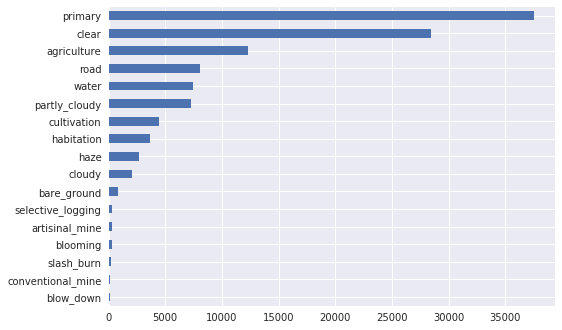

In [5]:
# Histogram of label instances
labels[label_list].sum().sort_values().plot.barh()

In [6]:
# number of labels for each image
labels['number_of_label']= labels[label_list].apply(sum, axis=1)
print ( 'max number of labels = ', max(labels.number_of_label))
print ( 'min number of labels = ', min(labels.number_of_label))
print ( 'average number of labels = ', np.mean(labels.number_of_label))

labels.number_of_label.value_counts()

max number of labels =  9
min number of labels =  1
average number of labels =  2.87074779515


2    19176
3     7194
4     7191
5     3697
1     2091
6      993
7      124
8       12
9        1
Name: number_of_label, dtype: int64

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


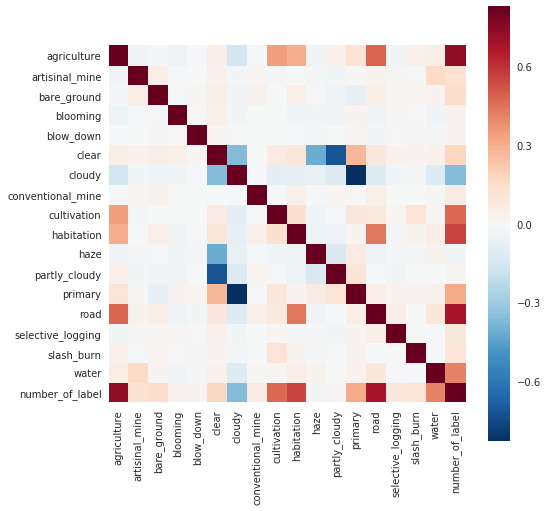

In [7]:
# Label correlations
corr = labels.corr()
plt.figure(figsize = (8,8))
sns.heatmap(corr,  vmax=.3, square=True)

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


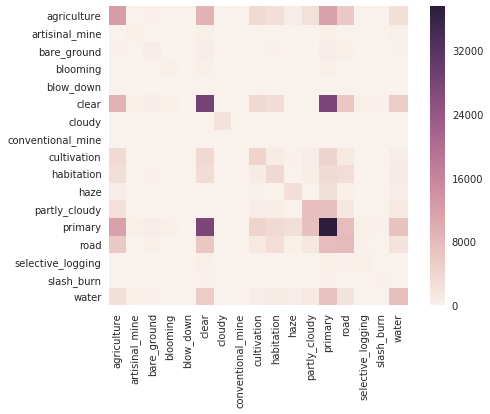

In [8]:
# label cooccurence matrix
label_matrix = labels[label_list]
coo_matrix = label_matrix.T.dot(label_matrix)
sns.heatmap(coo_matrix,  square=True)

In [9]:
coo_matrix

agriculture  artisinal_mine  bare_ground  blooming  \
agriculture              12315              38          225        32   
artisinal_mine              38             339           40         0   
bare_ground                225              40          862         3   
blooming                    32               0            3       332   
blow_down                   22               0            4         1   
clear                     9150             307          747       311   
cloudy                       0               0            0         0   
conventional_mine           24               4           10         0   
cultivation               3377              18           89        35   
habitation                2737              29          163         4   
haze                       672               5           41         4   
partly_cloudy             2493              27           74        17   
primary                  11972             324          683       332   
road                      6034             110          323        10   
selective_logging           65               6           13         7   
slash_burn                 119               0           10         2   
water                     2712             299          206        16   

                   blow_down  clear  cloudy  conventional_mine  cultivation  \
agriculture               22   9150       0                 24         3377   
artisinal_mine             0    307       0                  4           18   
bare_ground                4    747       0                 10           89   
blooming                   1    311       0                  0           35   
blow_down                 98     85       0                  0            8   
clear                     85  28431       0                 70         3527   
cloudy                     0      0    2089                  0            0   
conventional_mine          0     70       0                100            4   
cultivation                8   3527       0                  4         4477   
habitation                 3   3090       0                 36          895   
haze                       0      0       0                  2          202   
partly_cloudy             13      0       0                 28          748   
primary                   98  27668       0                 94         4455   
road                       2   6295       0                 59         1294   
selective_logging          1    308       0                  0           58   
slash_burn                 2    173       0                  0          126   
water                      3   5502       0                 26          868   

                   habitation  haze  partly_cloudy  primary  road  \
agriculture              2737   672           2493    11972  6034   
artisinal_mine             29     5             27      324   110   
bare_ground               163    41             74      683   323   
blooming                    4     4             17      332    10   
blow_down                   3     0             13       98     2   
clear                    3090     0              0    27668  6295   
cloudy                      0     0              0        0     0   
conventional_mine          36     2             28       94    59   
cultivation               895   202            748     4455  1294   
habitation               3660   129            441     3469  2786   
haze                      129  2697              0     2670   394   
partly_cloudy             441     0           7261     7175  1382   
primary                  3469  2670           7175    37513  7728   
road                     2786   394           1382     7728  8071   
selective_logging          13     5             27      340   151   
slash_burn                 41     3             33      209    36   
water                     915   613           1295     7001  2125   

                   selective_logging  

In [10]:
# Label pairs doesn't occur together
n = len(label_list)
for i in range(n):
    for j in range(i,n):
        if coo_matrix.ix[label_list[i], label_list[j]] == 0:
            print (label_list[i], label_list[j] )

agriculture cloudy
artisinal_mine blooming
artisinal_mine blow_down
artisinal_mine cloudy
artisinal_mine slash_burn
bare_ground cloudy
blooming cloudy
blooming conventional_mine
blow_down cloudy
blow_down conventional_mine
blow_down haze
clear cloudy
clear haze
clear partly_cloudy
cloudy conventional_mine
cloudy cultivation
cloudy habitation
cloudy haze
cloudy partly_cloudy
cloudy primary
cloudy road
cloudy selective_logging
cloudy slash_burn
cloudy water
conventional_mine selective_logging
conventional_mine slash_burn
haze partly_cloudy


# Images

In [11]:
# train image folder
image_dir = '/data/planet/train-jpg/'

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


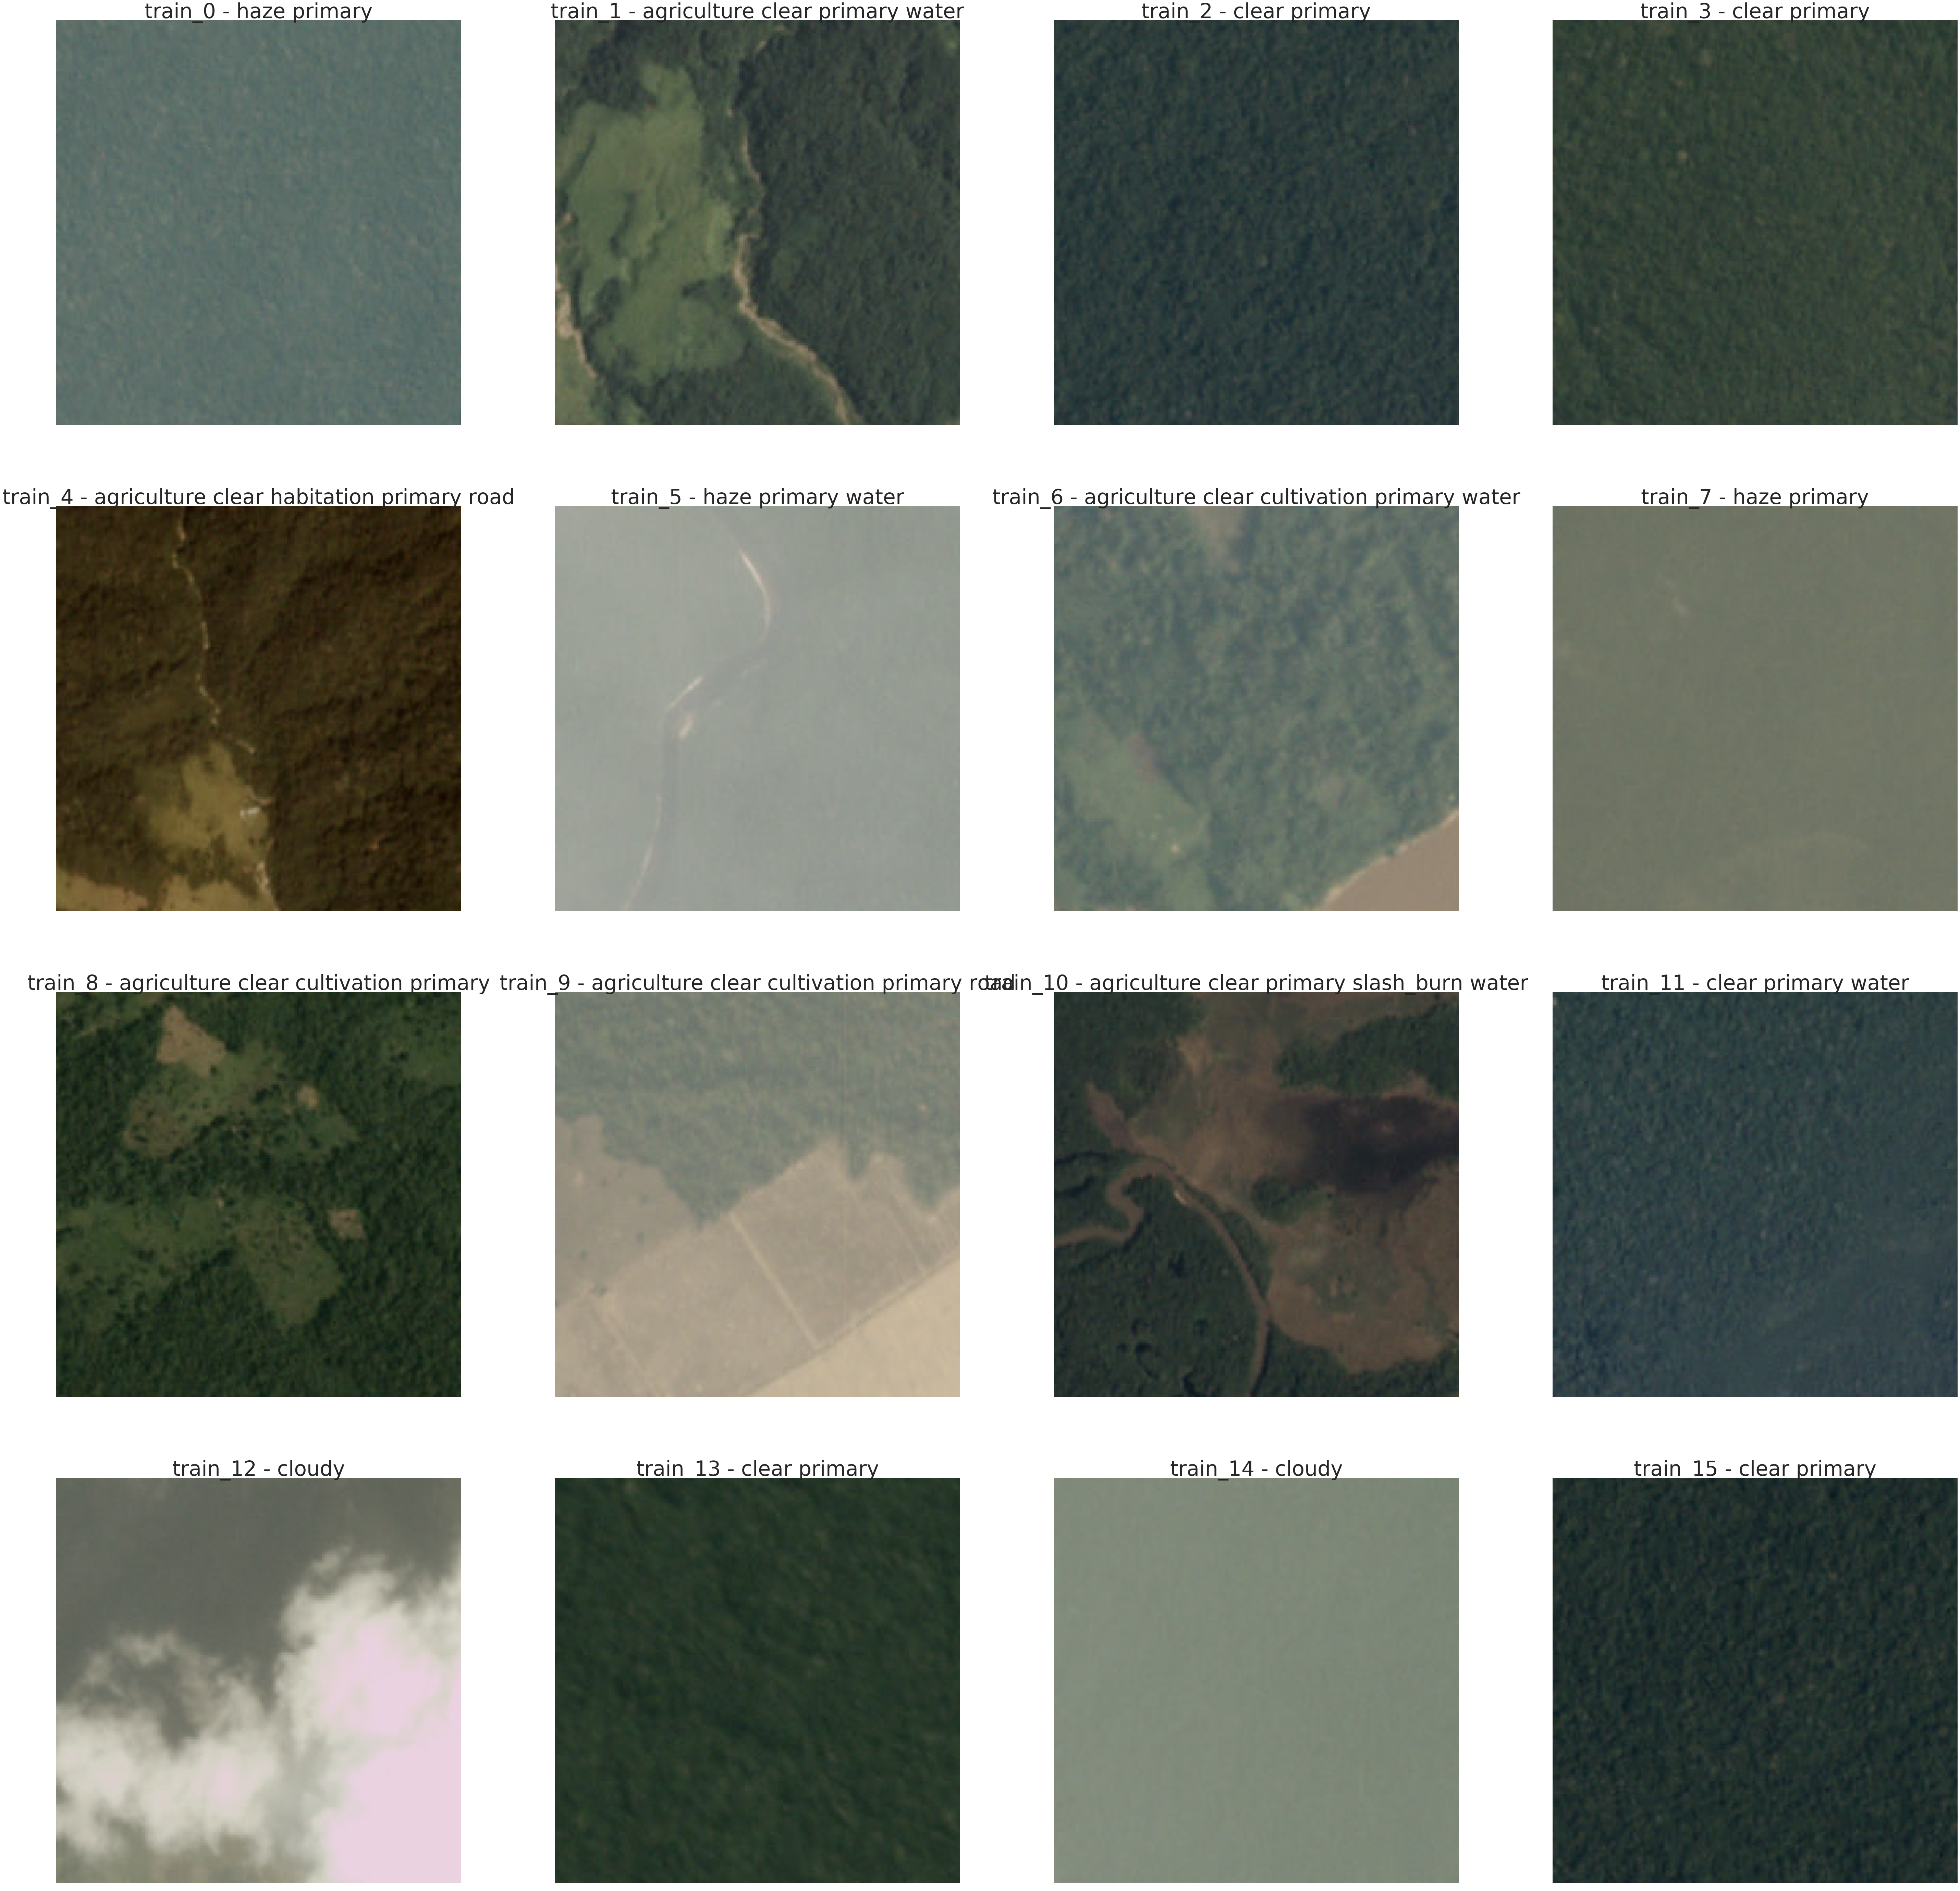

In [12]:
import cv2

plt.figure(figsize= (100,100))
i = 1
for f, l in labels.ix[:15,['image_name', 'tags']].values:
    img = cv2.imread(image_dir + '{}.jpg'.format(f))
    ax = plt.subplot(4,4,i)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title('{} - {}'.format(f, l), fontsize =60)
    ax.axis('off')
    i += 1
    
plt.show()

### Image flip

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


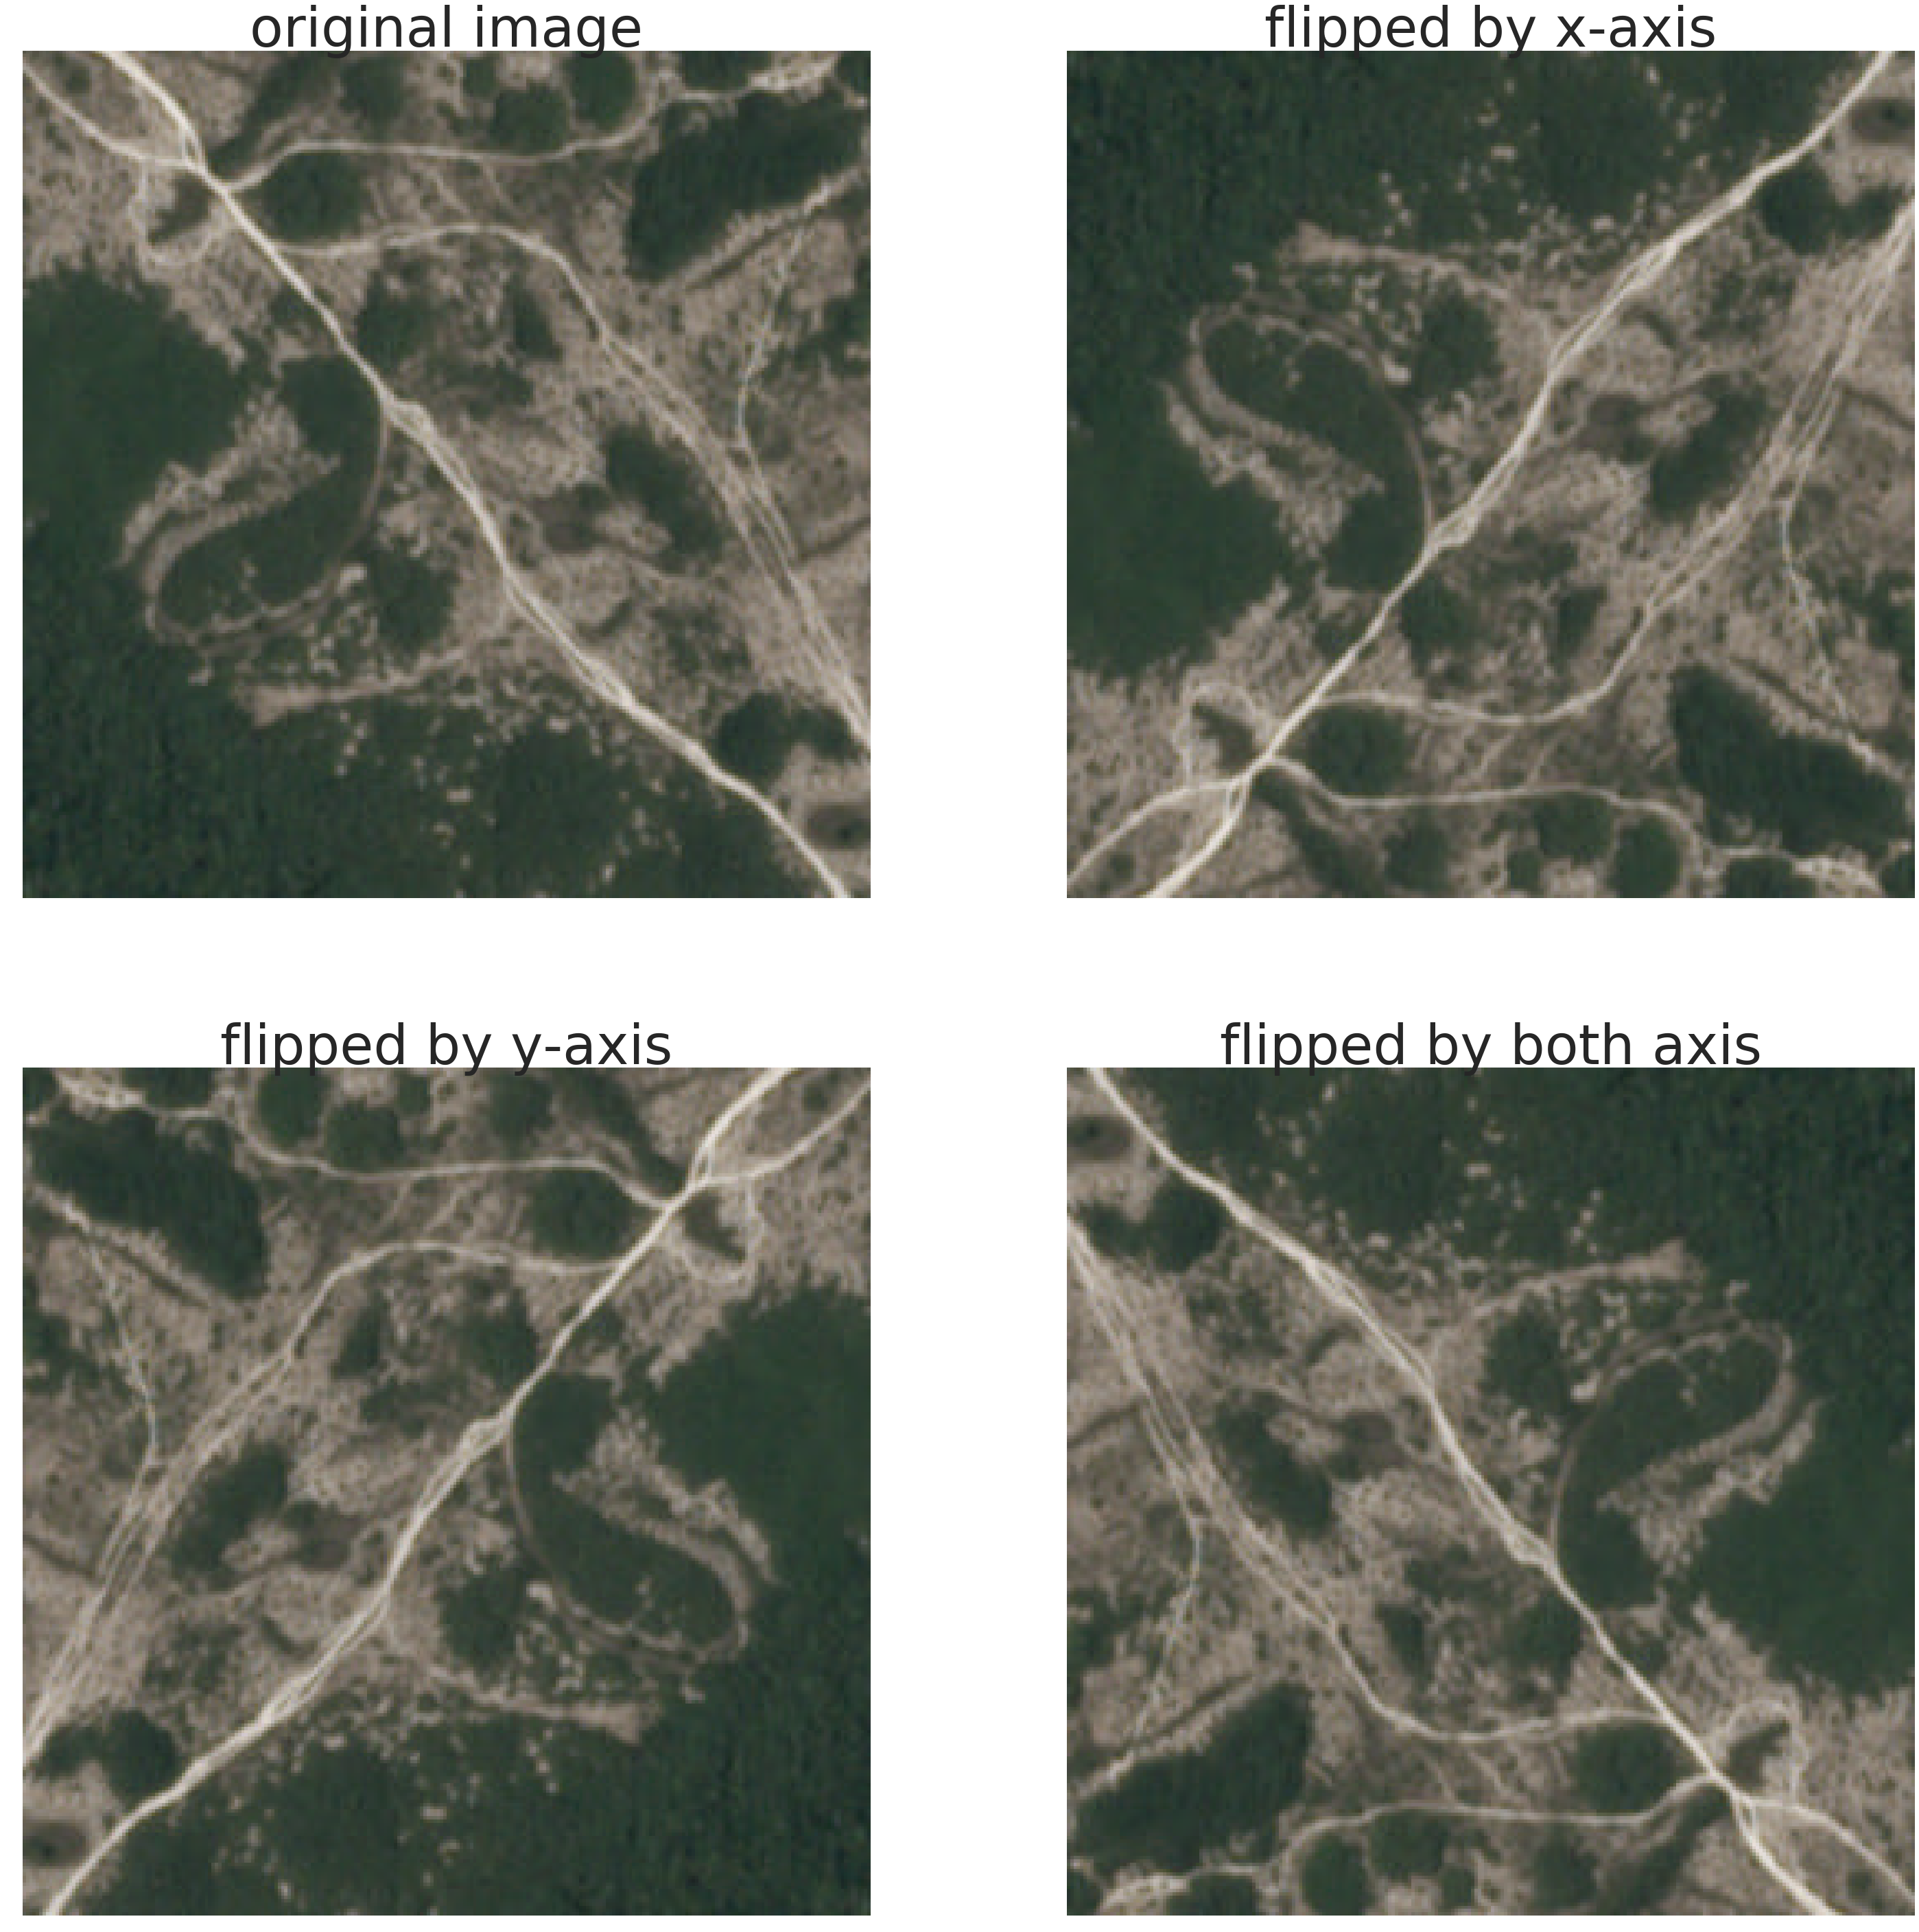

In [13]:
plt.figure(figsize= (50,50))
ax = plt.subplot(221)
img = cv2.imread(image_dir+'train_370.jpg')
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax.set_title('original image', fontsize =80)
ax.axis('off')

ax = plt.subplot(222)
imfx = cv2.flip(img,0)
ax.imshow(cv2.cvtColor(imfx, cv2.COLOR_BGR2RGB))
ax.set_title('flipped by x-axis', fontsize =80)
ax.axis('off')

ax = plt.subplot(223)
imfy = cv2.flip(img,1)
ax.imshow(cv2.cvtColor(imfy, cv2.COLOR_BGR2RGB))
ax.set_title('flipped by y-axis', fontsize =80)
ax.axis('off')

ax = plt.subplot(224)
imfz=cv2.flip(img,-1)
ax.imshow(cv2.cvtColor(imfz, cv2.COLOR_BGR2RGB))
ax.set_title('flipped by both axis', fontsize =80)
ax.axis('off')
plt.show()

### Image rotaion

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


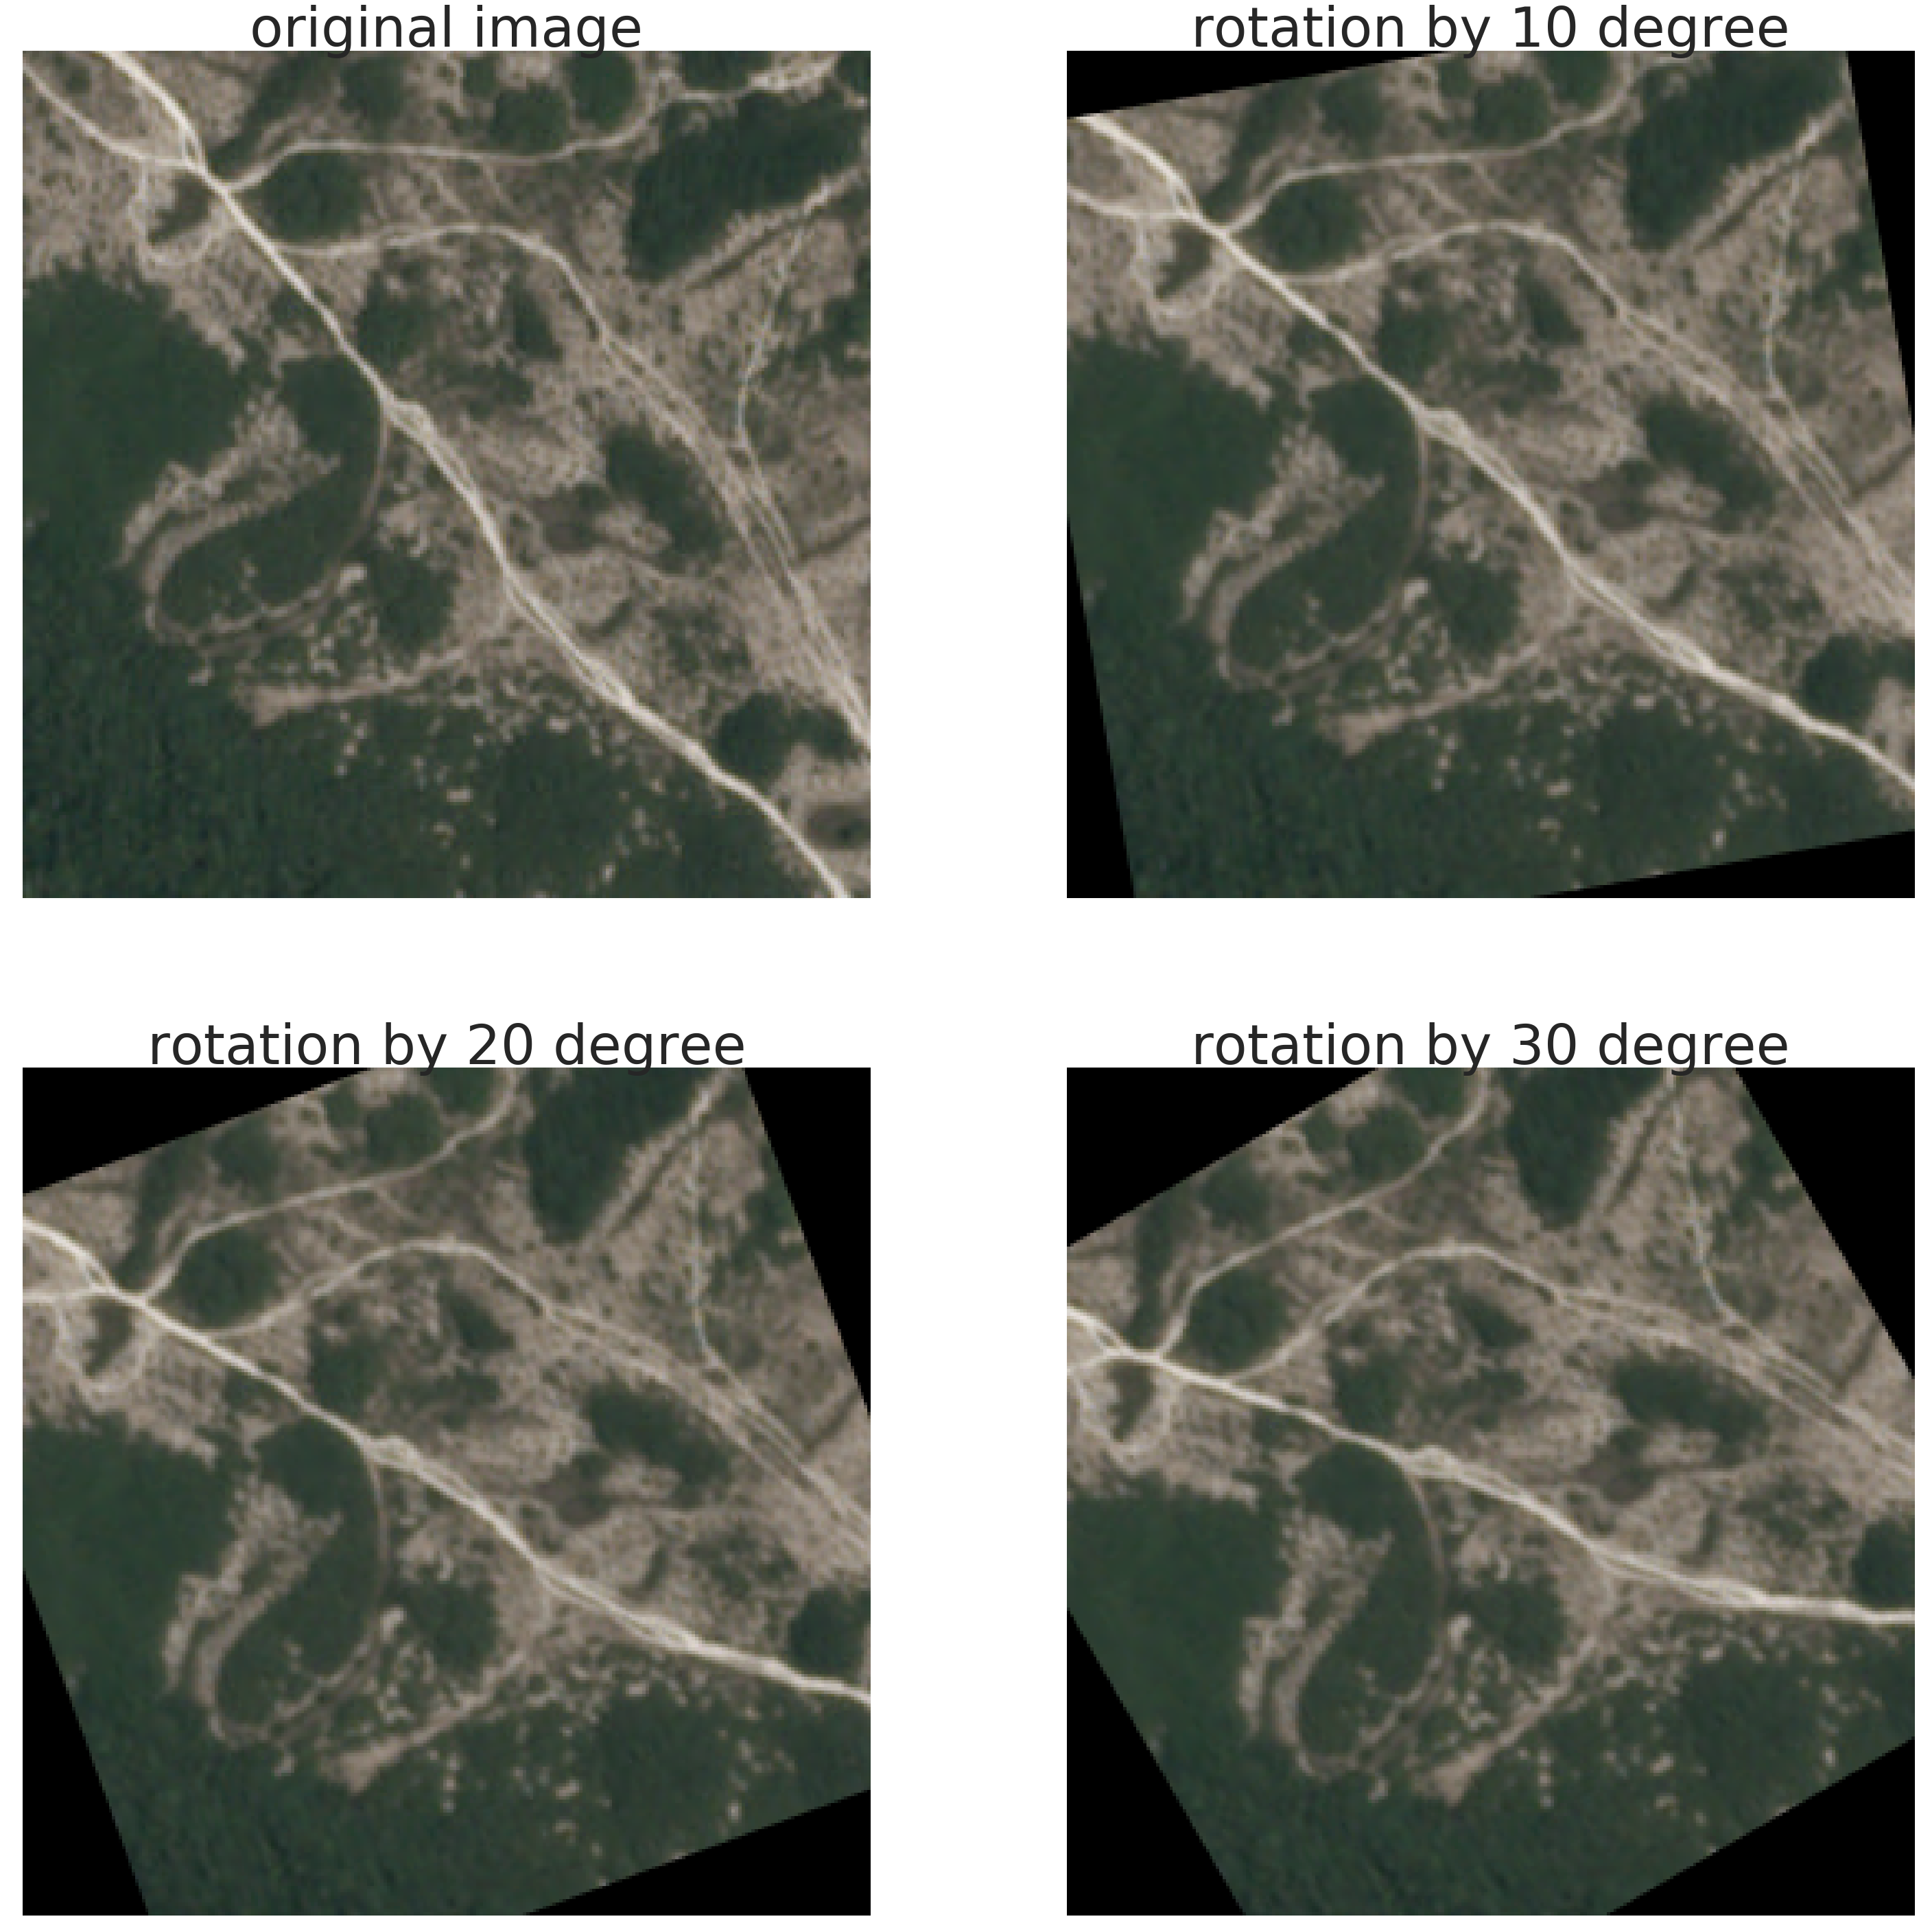

In [14]:
plt.figure(figsize= (50,50))
ax = plt.subplot(221)
img = cv2.imread(image_dir+'train_370.jpg')
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax.set_title('original image', fontsize =80)
ax.axis('off')

rows,cols, chanel = img.shape

ax = plt.subplot(222)
M = cv2.getRotationMatrix2D((cols/2,rows/2),10,1)
dst = cv2.warpAffine(img,M,(cols,rows))
ax.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
ax.set_title('rotation by 10 degree', fontsize =80)
ax.axis('off')

ax = plt.subplot(223)
M = cv2.getRotationMatrix2D((cols/2,rows/2),20,1)
dst = cv2.warpAffine(img,M,(cols,rows))
ax.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
ax.set_title('rotation by 20 degree', fontsize =80)
ax.axis('off')

ax = plt.subplot(224)
M = cv2.getRotationMatrix2D((cols/2,rows/2),30,1)
dst = cv2.warpAffine(img,M,(cols,rows))
ax.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
ax.set_title('rotation by 30 degree', fontsize =80)
ax.axis('off')

plt.show()